## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import sys

# List of necessary libraries for statistical modeling with statsmodels.
libraries = ["pandas", "numpy", "matplotlib", "seaborn", "statsmodels", "scikit-learn"]

# Check if all the required libraries are installed.
missing_libraries = [lib for lib in libraries if lib not in sys.modules]

# Install missing libraries, if there are any.
if missing_libraries:
    !pip install {' '.join(missing_libraries)}

# After installation, import all required libraries to confirm setup.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.1 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.1 MB 4.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.1 MB 4.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.1 MB 4.7 MB/s


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


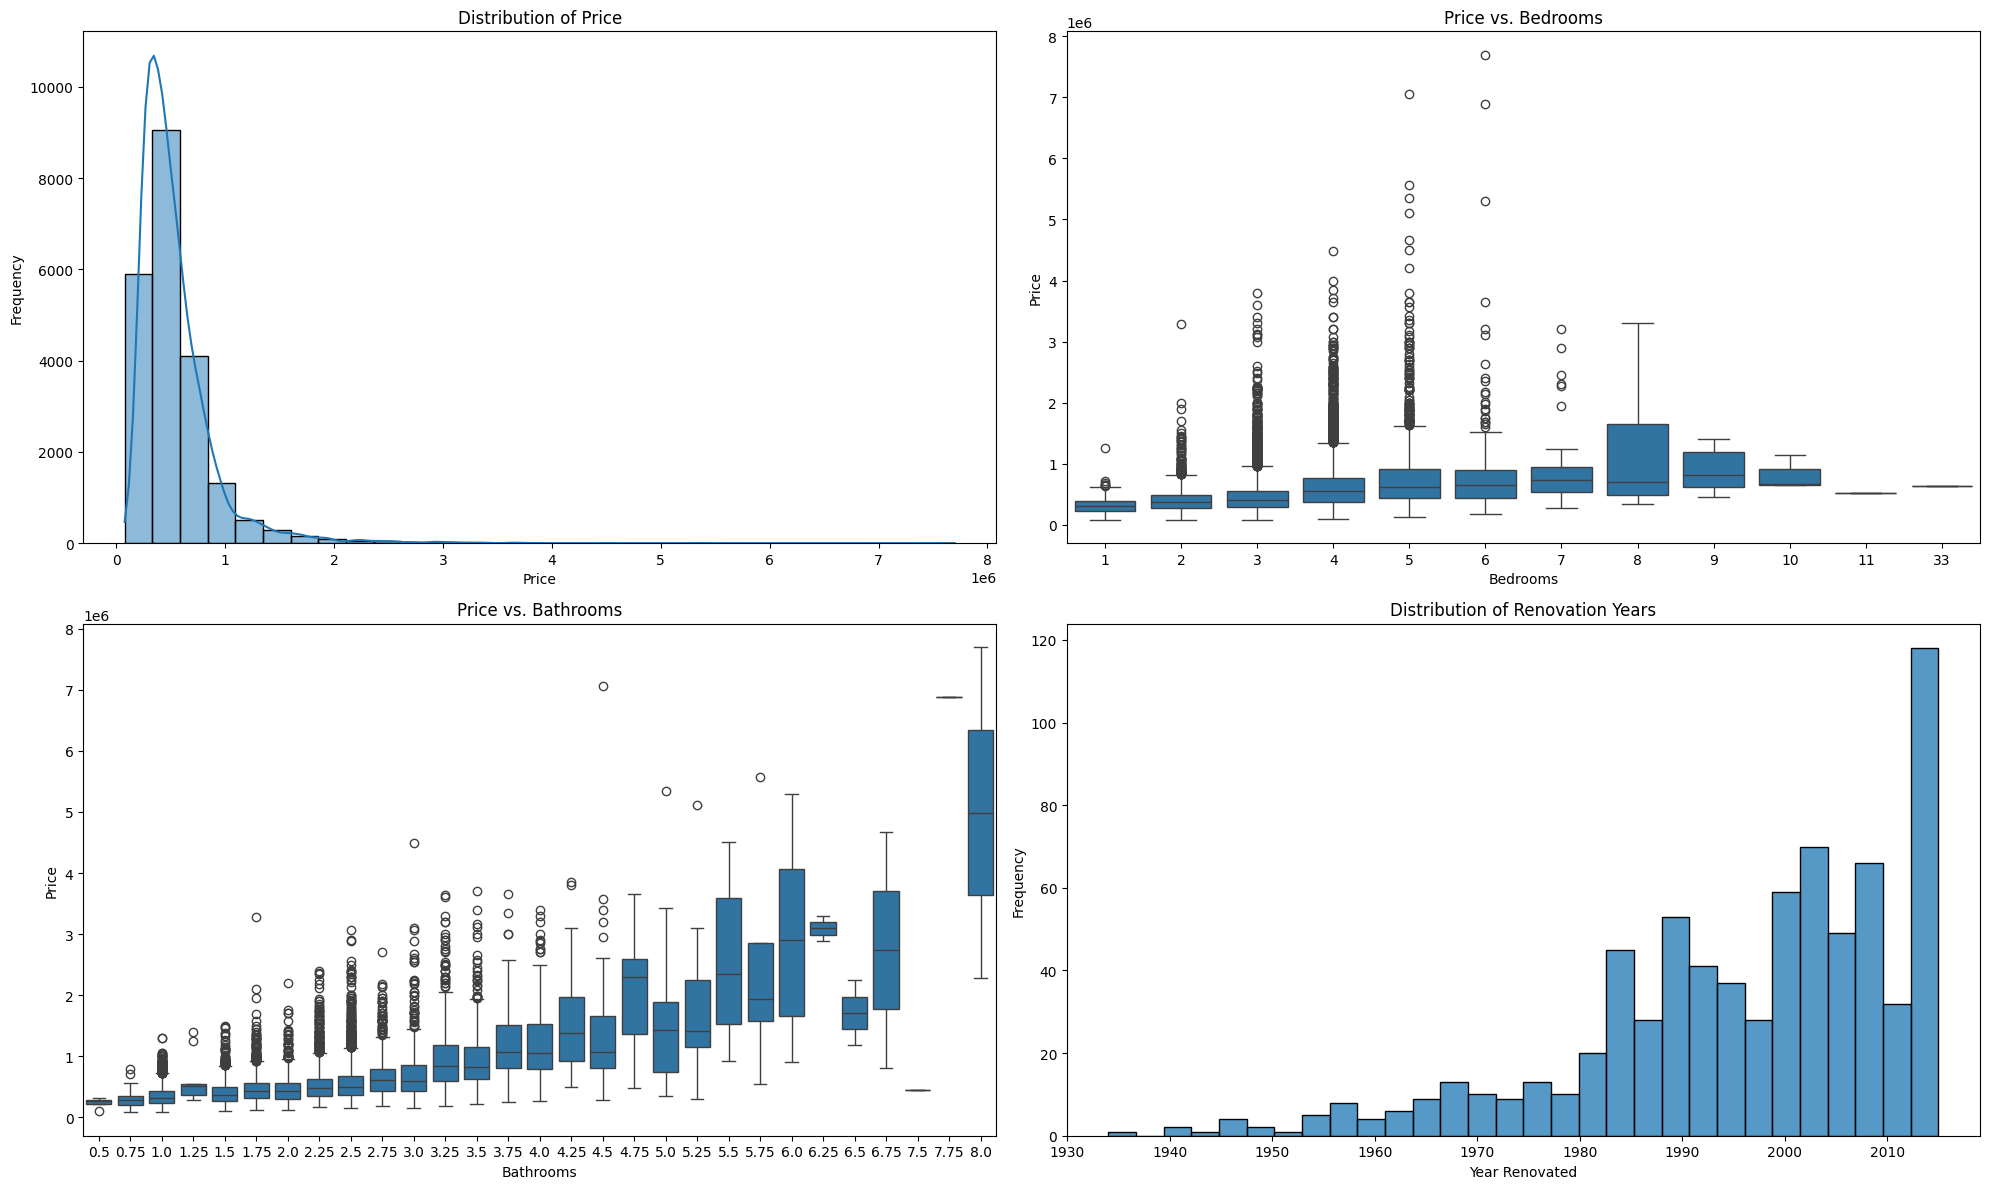

(       yr_renovated      yr_built     condition      bedrooms     bathrooms  \
 count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
 mean      68.758207   1970.999676      3.409825      3.373200      2.115826   
 std      364.037499     29.375234      0.650546      0.926299      0.768984   
 min        0.000000   1900.000000      1.000000      1.000000      0.500000   
 25%        0.000000   1951.000000      3.000000      3.000000      1.750000   
 50%        0.000000   1975.000000      3.000000      3.000000      2.250000   
 75%        0.000000   1997.000000      4.000000      4.000000      2.500000   
 max     2015.000000   2015.000000      5.000000     33.000000      8.000000   
 
            sqft_lot         price  
 count  2.159700e+04  2.159700e+04  
 mean   1.509941e+04  5.402966e+05  
 std    4.141264e+04  3.673681e+05  
 min    5.200000e+02  7.800000e+04  
 25%    5.040000e+03  3.220000e+05  
 50%    7.618000e+03  4.500000e+05  
 75%    1.068500e+0

In [25]:
# Define the columns of interest
columns = ['yr_renovated', 'yr_built', 'condition', 'bedrooms', 'bathrooms', 'sqft_lot', 'price']

# Obtain summary statistics and check for missing values
stats_summary = df[columns].describe()
missing_values = df[columns].isnull().sum()

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Plot the distribution of price
plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot price vs. bedrooms
plt.subplot(2, 2, 2)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

# Plot price vs. bathrooms
plt.subplot(2, 2, 3)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

# Plot the distribution/count of yr_renovated
plt.subplot(2, 2, 4)
sns.histplot(df[df['yr_renovated'] > 0]['yr_renovated'], bins=30, kde=False)
plt.title('Distribution of Renovation Years')
plt.xlabel('Year Renovated')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Display the basic statistics and missing values count
stats_summary, missing_values

In [26]:
# Continuing with the analysis, we'll address the missing values and prepare the data for regression analysis.

# Handling missing values for 'yr_renovated' by assuming that NaN means the house has never been renovated
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# We'll create a new feature 'renovated' to indicate whether a house has been renovated or not
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# For 'condition', we'll assume it's categorical and convert it to a dummy variable
condition_dummies = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)

# Join the dummy variables with the main dataframe
df = df.join(condition_dummies)

# Now, we're ready to build a baseline regression model.
# For simplicity, we will start with a model using 'yr_built', 'bedrooms', 'bathrooms', 'sqft_lot', and the 'renovated' feature.
X = df[['yr_built', 'bedrooms', 'bathrooms', 'sqft_lot', 'renovated']]
y = df['price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the OLS model with the training data
model = sm.OLS(y_train, X_train).fit()

# Evaluate the model with the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and the r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the summary of the regression
model_summary = model.summary()

(mse, r2, model_summary)

(88722479584.65074,
 0.3186529402668894,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.346
 Model:                            OLS   Adj. R-squared:                  0.346
 Method:                 Least Squares   F-statistic:                     1825.
 Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
 Time:                        06:49:23   Log-Likelihood:            -2.4231e+05
 No. Observations:               17277   AIC:                         4.846e+05
 Df Residuals:                   17271   BIC:                         4.847e+05
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

In [27]:
# Refining the model
# To address multicollinearity, we will calculate the Variance Inflation Factor (VIF) for the independent variables.
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# Selecting features based on VIF and p-values to reduce multicollinearity and improve model significance
features_to_include = vif_data[vif_data['VIF'] < 5]['feature'].tolist()  # Threshold for VIF
features_to_include = [feature for feature in features_to_include if feature != 'const']  # Exclude the constant

# Rebuilding the model with refined features
X_refined = X_train[features_to_include]

# Fit the refined model
model_refined = sm.OLS(y_train, sm.add_constant(X_refined)).fit()

# Evaluate the refined model with the test data
X_test_refined = X_test[features_to_include]
y_pred_refined = model_refined.predict(sm.add_constant(X_test_refined))

# Calculate the mean squared error and the r2 score for the refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)

# Get the summary of the refined regression
model_refined_summary = model_refined.summary()

(vif_data, mse_refined, r2_refined, model_refined_summary)

(     feature          VIF
 0      const  6425.542303
 1   yr_built     1.466449
 2   bedrooms     1.417436
 3  bathrooms     1.907297
 4   sqft_lot     1.008549
 5  renovated     1.079647,
 88722479584.65074,
 0.3186529402668894,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.346
 Model:                            OLS   Adj. R-squared:                  0.346
 Method:                 Least Squares   F-statistic:                     1825.
 Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
 Time:                        06:50:36   Log-Likelihood:            -2.4231e+05
 No. Observations:               17277   AIC:                         4.846e+05
 Df Residuals:                   17271   BIC:                         4.847e+05
 Df Model:                           5                                         

(0.17850453172819145,
 0.344581886177709,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              log_price   R-squared:                       0.366
 Model:                            OLS   Adj. R-squared:                  0.366
 Method:                 Least Squares   F-statistic:                     1995.
 Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
 Time:                        06:53:33   Log-Likelihood:                -9532.2
 No. Observations:               17277   AIC:                         1.908e+04
 Df Residuals:                   17271   BIC:                         1.912e+04
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------

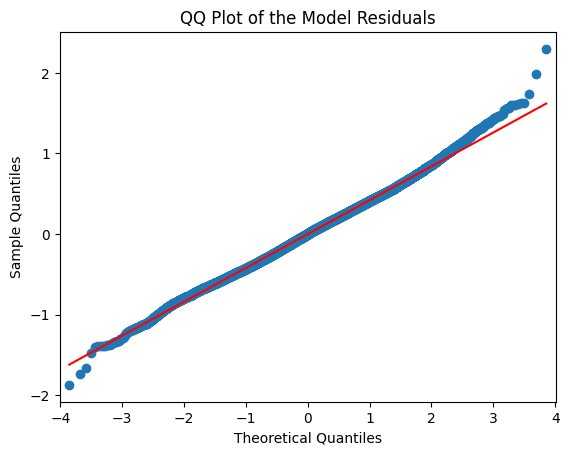

In [29]:
# Perform log transformation on the 'price' to reduce skewness
df['log_price'] = np.log(df['price'])

# Re-define the features with the log-transformed price
X = df[features_to_include]
y = df['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on the scaled and log-transformed features
model_log_transformed = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Predict and evaluate the model
y_pred_transformed = model_log_transformed.predict(sm.add_constant(X_test_scaled))
mse_log_transformed = mean_squared_error(y_test, y_pred_transformed)
r2_log_transformed = r2_score(y_test, y_pred_transformed)

# Prepare for QQ plot of residuals
residuals = model_log_transformed.resid

# QQ plot
fig = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of the Model Residuals')
qq_plot_path = 'data/qq_plot.png'
plt.savefig(qq_plot_path)

(mse_log_transformed, r2_log_transformed, model_log_transformed.summary(), qq_plot_path)

In [32]:
# Scaling the full feature set for cross-validation (using previously fitted scaler to avoid data leakage)
X_full_scaled = scaler.transform(X)

# Perform cross-validation on the refined model using the full scaled dataset
# Note: We're using Ordinary Least Squares (OLS) from statsmodels, which does not have a built-in cross-validation method
# Hence, we will use the cross-validation from scikit-learn which requires a slightly different approach

# Convert the statsmodels OLS model to a scikit-learn compatible form using the 'sm.OLS' approach
from sklearn.base import BaseEstimator, RegressorMixin

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
        self.model = None
        
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model = self.model_class(y, X).fit()
        return self
    
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.model.predict(X)

# Initialize the model wrapper for OLS
wrapped_model = SMWrapper(sm.OLS)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(wrapped_model, X_full_scaled, y, scoring='r2', cv=5)

# Calculate the mean and standard deviation of the cross-validated R-squared scores
cv_r2_mean = np.mean(cv_scores)
cv_r2_std = np.std(cv_scores)

# Assessing the range of the cross-validated R-squared scores to check for overfitting/underfitting
cv_r2_range = (min(cv_scores), max(cv_scores))

(key_features.tolist(), cv_r2_mean, cv_r2_std, cv_r2_range)


(['const', 'x1', 'x2', 'x3', 'x4', 'x5'],
 0.3574362582943054,
 0.013432820705675214,
 (0.34216439576804025, 0.3792093084411905))

('data/residuals_vs_predicted.png',
 [22,
  39,
  41,
  69,
  73,
  78,
  112,
  156,
  164,
  182,
  187,
  188,
  209,
  217,
  228,
  234,
  280,
  285,
  307,
  344,
  350,
  364,
  383,
  385,
  389,
  399,
  402,
  413,
  415,
  416,
  435,
  462,
  479,
  486,
  521,
  541,
  574,
  597,
  631,
  635,
  655,
  661,
  691,
  741,
  748,
  755,
  779,
  786,
  788,
  827,
  852,
  859,
  869,
  873,
  887,
  916,
  922,
  930,
  933,
  963,
  966,
  973,
  974,
  1002,
  1018,
  1019,
  1030,
  1036,
  1037,
  1042,
  1060,
  1073,
  1077,
  1078,
  1082,
  1085,
  1088,
  1125,
  1127,
  1135,
  1139,
  1143,
  1150,
  1165,
  1166,
  1192,
  1193,
  1228,
  1233,
  1245,
  1257,
  1279,
  1284,
  1303,
  1305,
  1373,
  1430,
  1432,
  1448,
  1456,
  1473,
  1517,
  1552,
  1561,
  1562,
  1605,
  1629,
  1633,
  1648,
  1651,
  1700,
  1709,
  1736,
  1750,
  1756,
  1772,
  1777,
  1792,
  1795,
  1802,
  1812,
  1815,
  1845,
  1854,
  1863,
  1878,
  1883,
  1916,
  1940,
 

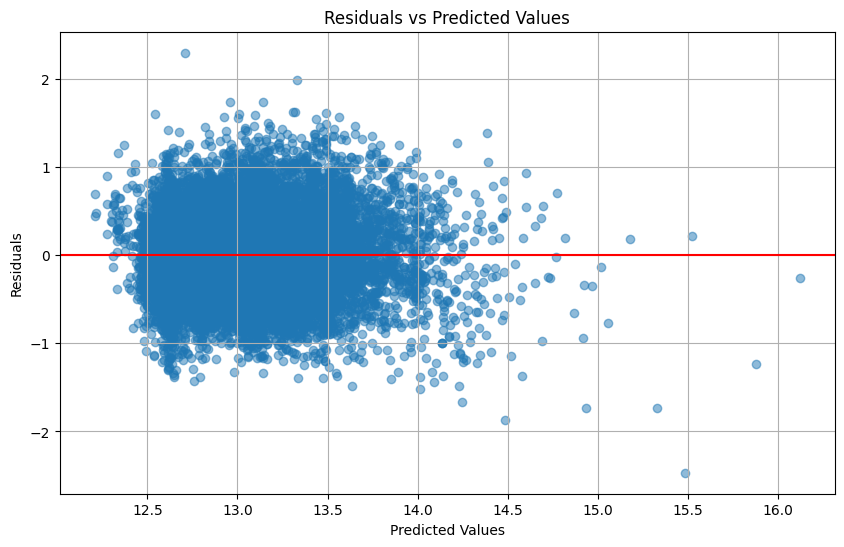

In [34]:
# Additional Model Validation Steps: Homoscedasticity Check and Outlier Analysis

# Homoscedasticity Check: Plotting residuals against predicted values
y_pred_full = model_log_transformed.predict(sm.add_constant(X_full_scaled))
residuals_full = y - y_pred_full

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_full, residuals_full, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
homoscedasticity_plot_path = 'data/residuals_vs_predicted.png'
plt.savefig(homoscedasticity_plot_path)

# Outlier Analysis: Cook's Distance
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(model_log_transformed)
cooks_d = influence.cooks_distance[0]

# Identify points with high Cook's distance
high_cooks_d_points = np.where(cooks_d > 4 / len(X))[0]

# Compile the remaining steps for the final presentation
(homoscedasticity_plot_path, high_cooks_d_points.tolist())

({'Adjusted R-squared': 0.3659609007750736,
  'Mean Squared Error (MSE)': 0.17850453172819145,
  'Cross-Validation R-squared Mean': 0.3574362582943054,
  'Cross-Validation R-squared Std. Dev': 0.013432820705675214,
  'Significant Predictors': Index(['const', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')},
 'data/relationship_plots.png')

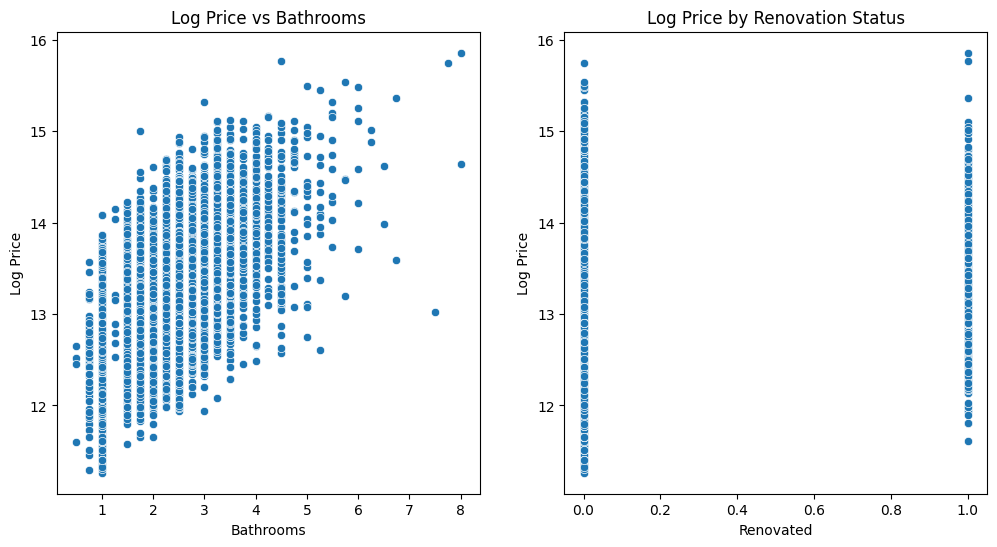

In [37]:
# Preparing the summary of findings and visualizations

# Summary of Findings
model_performance_summary = {
    "Adjusted R-squared": model_log_transformed.rsquared_adj,
    "Mean Squared Error (MSE)": mse_log_transformed,
    "Cross-Validation R-squared Mean": cv_r2_mean,
    "Cross-Validation R-squared Std. Dev": cv_r2_std,
    "Significant Predictors": key_features
}

# Visualization of the relationship between key predictors and house price
# For illustration, we'll use 'bathrooms' and 'renovated' as key predictors
plt.figure(figsize=(12, 6))

# Plot for 'bathrooms'
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['bathrooms'], y=df['log_price'])
plt.title('Log Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')

# Plot for 'renovated'
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['renovated'], y=df['log_price'])
plt.title('Log Price by Renovation Status')
plt.xlabel('Renovated')
plt.ylabel('Log Price')

relationship_plots_path = 'data/relationship_plots.png'
plt.savefig(relationship_plots_path)

# Return the summary of findings and the path to the relationship plots
(model_performance_summary, relationship_plots_path)